# 7月5日课程作业

In [12]:
import numpy as np
import pyvista as pv

from scipy.sparse import coo_matrix, csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

首先加载并可视化一个双环面，如下所示：

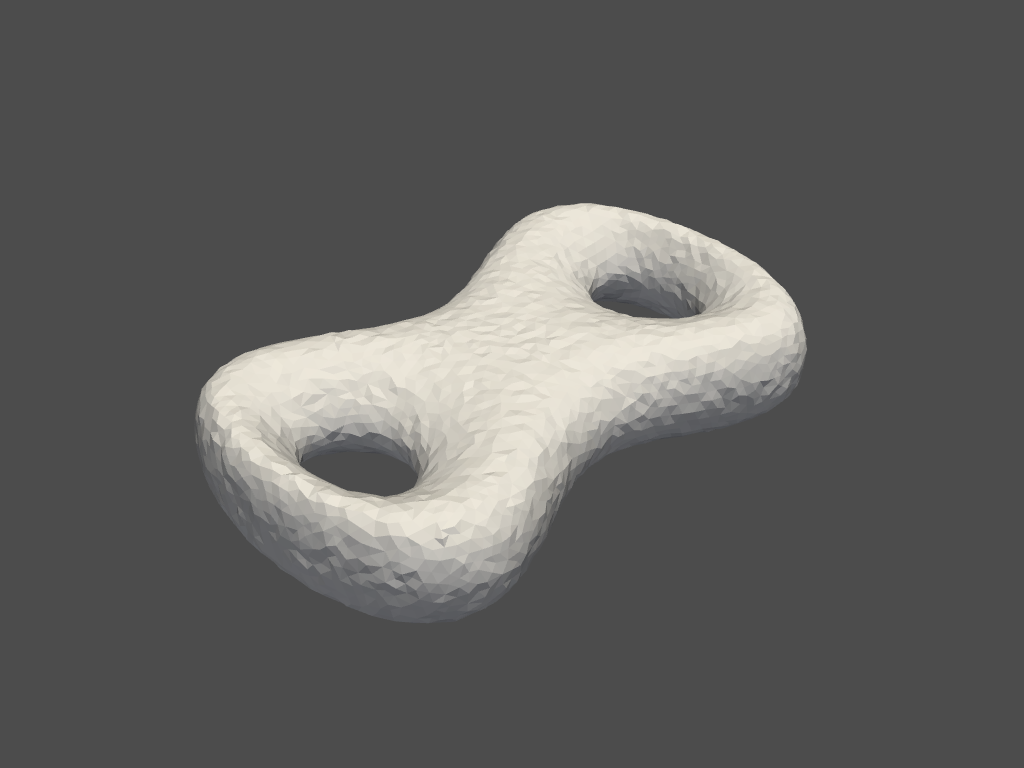

In [2]:
mesh = pv.read('../../data/doubletorus.vtu')
mesh.plot(screenshot='../../data/doubletorus.png')

mesh 有一定的结构，我们可以看到其中的所有顶点，如下：

In [16]:
mesh.points

pyvista_ndarray([[ 0.168123  , -0.0755884 , -0.202557  ],
                 [-0.0540063 , -0.446305  , -0.00309186],
                 [ 0.0884401 , -0.366978  , -0.15543   ],
                 ...,
                 [ 0.76968   ,  0.666641  ,  0.0145876 ],
                 [ 0.561993  , -0.595955  , -0.14418   ],
                 [ 0.637573  , -0.291708  ,  0.131263  ]])

In [ ]:
我们可以给点染色，效果如下

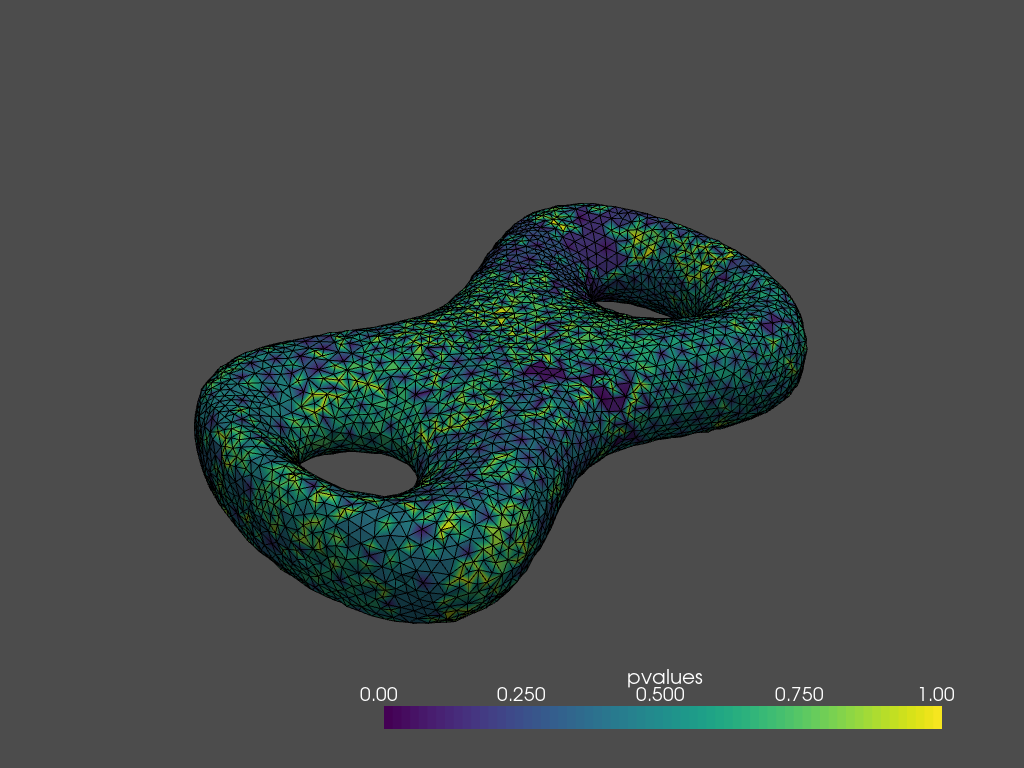

In [23]:
mesh.point_arrays['pvalues'] = np.linspace(0.0, 1.0, mesh.n_points)
mesh.plot(scalars='pvalues', show_edges=True, screenshot='points_coloring.png')

基于上面的 API，让我们试验一下一个双环面上一个燃烧的过程，火从一点开始向外蔓延，遇到已经燃烧过的就停下蔓延，我们把停止蔓延处的点都记录下来。